# Introduction to Neo4J and using a Graph Database
> A description of the data, and then how to connect and query the database.

- title: Neo4J Graph Database Introduction
- toc: true
- comments: true
- categories: [python]
- image: images/neo4j_icon.png

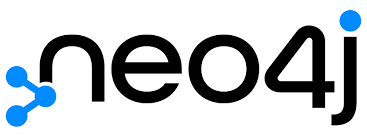

# Introduction

CS-Students is a sample knowledge graph that can be used to model any classroom that is relation based (a classroom that has lots of different people, pairs, groups, periods; things like that). This notebook is meant to demonstrate how to query this knowledge graph based on the preset things that are currently in the sample data.

# Data

## Currently, the data consists of the following categories (which are labels in Neo4J):

##### Period (most teachers would find it useful to have their data divided into class periods)
##### Scrum Team (basically, the largest overarching groups of students, under period)
##### Pairs (pairs of students within scrum teams)
##### Person (object that represents each student)

## The data also has the following relationships

##### IN_PERIOD (to relate teams to the period they are in)
##### CROSSOVER (a relationship that exists to connect pairs of teams which work together)
##### PAIR_SHARE (relationship defining students who are paired together)
##### IN_GROUP (to relate people to the group they are in)

# Setup in Anaconda

1: Install Anaconda

2: On windows, open the Anaconda command prompt. On mac, open the normal terminal.

3: Run the following commands:

conda install jupyter

conda install py2neo

conda install pandas

conda install neo4jupyter

4: If you haven't already, then clone this repository to a location that you can navigate to easily in your files.

5: The commands above have configured your conda environment. Now, simply run the command

jupyter notebook

6: This should open up something in the browser. You will see all of your files. Navigate to the directory which has the github repository clone.

7: Then, navigate to this notebook. You should be able to run this notebook and experience all of its features now!

# Setup in an IDE like VSCode

1: In the IDE terminal, run the following commands:

pip install jupyter

pip install py2neo

pip install pandas

pip install neo4jupyter

2: You're all set to run the notebook!

In [19]:
import pandas as pd
import getpass
from py2neo import Graph, Node, Relationship
from py2neo import GraphService
import neo4jupyter
neo4jupyter.init_notebook_mode()

<IPython.core.display.Javascript object>

In [15]:
# The database is hosted on AuraDB, and this is the connection URI for it
# The password is made private. 
password = getpass.getpass(prompt='Password: ', stream=None) 
graph = Graph("neo4j+ssc://f9708be2.databases.neo4j.io", auth=("neo4j", password))

# database
gs = GraphService("neo4j+ssc://f9708be2.databases.neo4j.io", auth=("neo4j", password))

In [16]:
# Run this cell to visualize all of the people in the graph!
neo4jupyter.draw(graph, {"PERSON": "name"})

In [17]:
# Returns all scrum teams and links to the runtimes of projects
query = "MATCH(n:SCRUM_TEAM) RETURN n.name AS TeamName, n.runtimelink AS RuntimeLink"
graph.run(query).to_data_frame()

,TeamName,RuntimeLink
0,Team 1,www.team1.com
1,Team 2,www.team2.com


In [18]:
# Returns the people in Team 1 and their jobs
query = "MATCH(n1:PERSON)-[rel:IN_GROUP]->(n2:SCRUM_TEAM {name: \"Team 1\"}) RETURN n1.name AS Person, rel.Job AS Job"
graph.run(query).to_data_frame()

,Person,Job
0,Doug,Deployment Manager
1,Carl,Technical Officer
2,Bob,Design Manager
3,Alice,Scrum Master


In [ ]:
# Returns the people in Team 2 and their jobs
query = "MATCH(n1:PERSON)-[rel:IN_GROUP]->(n2:SCRUM_TEAM {name: \"Team 2\"}) RETURN n1.name AS Person, rel.Job AS Job"
graph.run(query).to_data_frame()

,Person,Job
0,Henry,Design Manager
1,George,Technical Officer
2,Ferb,Deployment Manager
3,Eve,Scrum Master


# The following cells show how to do CRUD operations

You can do more than just query! To see your changes in effect, rerun the visualization in the third cell.

In [ ]:
# Create a node for a new person
def CreatePerson(personName):
    tx = graph.begin()
    createdPerson = Node("PERSON", name = personName)
    tx.create(createdPerson)
    graph.commit(tx)

def CreatePersonTester():
    n = input("Enter a person name: ")
    CreatePerson(n)

# Run the CreatePersonTester function to try creating a node. You should be able to find your new node!
CreatePersonTester()

In [ ]:
# Update an existing node for a person by changing their name.
# Note that this breaks with duplicate names. This is simply for demonstration purposes.
# In a real application, you need to have a way to query by unique ID
def UpdateAPerson(personName, newName):
    graph.evaluate("MATCH (n:PERSON) WHERE n.name =\"" + str(personName) + "\" SET n.name=\"" + str(newName) + "\"")

def UpdateAPersonTester():
    o = str(input("Enter the name you want to change: "))
    n = str(input("Enter the new name: "))
    UpdateAPerson(o, n)

# Try updating the node that you created in the last code block!
UpdateAPersonTester()

In [ ]:
# Delete an existing node for a person, based on name. 
# Note that this breaks with duplicate names. This is simply for demonstration purposes.
def DeleteAPerson(personName):
    node = graph.evaluate("MATCH (n:PERSON) WHERE n.name =\"" + str(personName) + "\" RETURN n")
    try:
        graph.delete(node)
    except:
        return

def DeleteAPersonTester():
    x = str(input("Enter a person name: "))
    DeleteAPerson(x)

# You can try deleting the node that you created by simply entering the person name
DeleteAPersonTester()

Enter the name you want to change: Among
Enter the new name: Sahil
